In [542]:
#Yuki Yu - HW1

In [543]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

In [544]:
# To update Beta-Binomial posterior
def update_posterior(alpha, beta, x, n):
    alpha_post = x+alpha
    beta_post = n-x+beta
    return alpha_post, beta_post

In [545]:
# Parameters for prior Beta distribution
alpha_prior = 1
beta_prior = 1

# Initial posterior parameters
alpha_A, beta_A = alpha_prior, beta_prior
alpha_B, beta_B = alpha_prior, beta_prior
alpha_C, beta_C = alpha_prior, beta_prior

In [546]:
# Simulate and update
for i in range(10):
    # Draw 1 sample from each posterior distribution
    sample_A = np.random.beta(alpha_A, beta_A)
    sample_B = np.random.beta(alpha_B, beta_B)
    sample_C = np.random.beta(alpha_C, beta_C)
    
    # Select the choice with the highest sampled value
    choice = np.argmax([sample_A, sample_B, sample_C])
    
    # Simulate data for the choice
    if choice == 0:
        data = {'successes': stats.binom(n=1, p=0.8).rvs(size=1)[0], 'trials': 1}
        alpha_A, beta_A = update_posterior(alpha_A, beta_A, data['successes'], data['trials'])
    elif choice == 1:
        data = {'successes': stats.binom(n=1, p=0.5).rvs(size=1)[0], 'trials': 1}
        alpha_B, beta_B = update_posterior(alpha_B, beta_B, data['successes'], data['trials'])
    elif choice == 2:
        data = {'successes': stats.binom(n=1, p=0.2).rvs(size=1)[0], 'trials': 1}
        alpha_C, beta_C = update_posterior(alpha_C, beta_C, data['successes'], data['trials'])

Posterior distribution for A: Alpha = 5 , Beta = 3
Posterior distribution for B: Alpha = 2 , Beta = 2
Posterior distribution for C: Alpha = 1 , Beta = 3


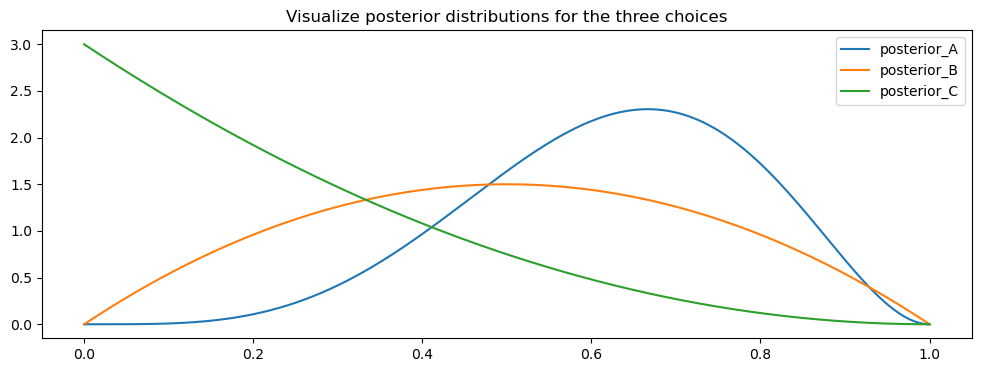

In [547]:
# Print the parameters of the final posterior distributions
print("Posterior distribution for A: Alpha =", alpha_A, ", Beta =", beta_A)
print("Posterior distribution for B: Alpha =", alpha_B, ", Beta =", beta_B)
print("Posterior distribution for C: Alpha =", alpha_C, ", Beta =", beta_C)

# Posterior distributions
parameter_domain = np.linspace(0,1,1001)
posterior_A = stats.beta(alpha_A, beta_A).pdf(parameter_domain)
posterior_B = stats.beta(alpha_B, beta_B).pdf(parameter_domain)
posterior_C = stats.beta(alpha_C, beta_C).pdf(parameter_domain)
plt.figure(figsize=(12,4)); 
plt.plot(parameter_domain, posterior_A, label="posterior_A"); 
plt.plot(parameter_domain, posterior_B, label="posterior_B"); 
plt.plot(parameter_domain, posterior_C, label="posterior_C"); plt.legend();
plt.title("Visualize posterior distributions for the three choices"); 

In [548]:
# Check which choice has the highest sum of alpha and beta
sums = [alpha_A + beta_A, alpha_B + beta_B, alpha_C + beta_C]
best_option = np.argmax(sums)

# Print the best choice
print("The best choice is:", ['A', 'B', 'C'][best_option])

The best choice is: A
